In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

In [105]:
email_opened_table=pd.read_csv("email_opened_table.csv")
email_table=pd.read_csv("email_table.csv")
link_click_table=pd.read_csv("link_clicked_table.csv")

In [4]:
email_table.head()

email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  
0                    5  
1                    2  
2                    2  
3                    1  
4                    6

Question1:What % of users opened email and what % clicked on the link within email

In [19]:
#%of users opened email
per_email_open=email_opened_table.shape[0]/email_table.shape[0]
str(per_email_open*100) + "%" +" "+ "opened email"

'10.345% opened email'

In [24]:
#%of users opened link within email
per_link_open=link_click_table.shape[0]/email_table.shape[0]
str(per_link_open*100) + "%" +" "+ "opened link within email"

'2.119% opened link within email'

merge datsets

In [106]:
email_opened_table['email_opened']=1
link_click_table['link_opened']=1

In [107]:
email_table= pd.merge(email_table, email_opened_table, on='email_id', how='left')
email_table=pd.merge(email_table,link_click_table,on='email_id',how='left')

In [108]:
email_table.head()

email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  email_opened  link_opened  
0                    5           NaN          NaN  
1                    2           1.0          1.0  
2                    2           NaN          NaN  
3                    1           NaN          NaN  
4                    6           NaN          NaN

In [109]:
email_table['email_opened']=email_table['email_opened'].fillna(0)
email_table['link_opened']=email_table['link_opened'].fillna(0)

In [110]:
email_table.head()

email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  email_opened  link_opened  
0                    5           0.0          0.0  
1                    2           1.0          1.0  
2                    2           0.0          0.0  
3                    1           0.0          0.0  
4                    6           0.0          0.0

Question2:The VP of marketing thinks that it is stupid to send emails to a random subset and in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?

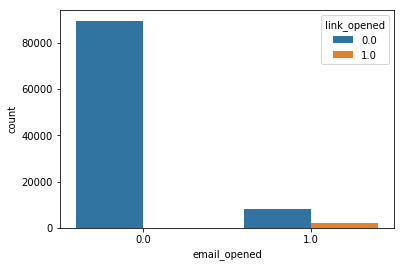

In [68]:
sns.countplot(x="email_opened",hue="link_opened", data=email_table)
plt.show()

There seems to be a strong relation between users who clicked email and opened link as evident from the count plot. So for further
we will only show plot between feature and if user opened the email

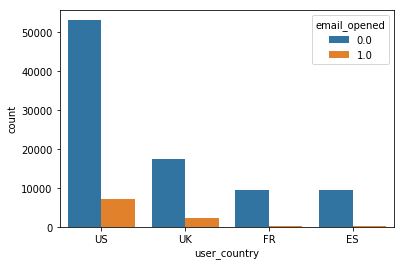

In [52]:
sns.countplot(x="user_country",hue="email_opened", data=email_table)
plt.show()

maximum emails are sent to users in US with most of the people opening emails in us only. 

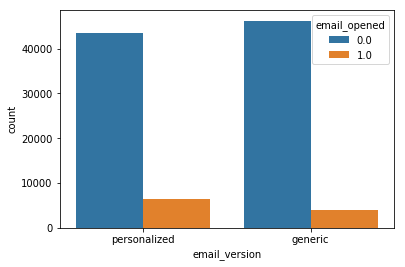

In [55]:
sns.countplot(x="email_version",hue="email_opened", data=email_table)
plt.show()

We see that even though less personalized emails are sent than the generic ones, more emails are opened by users who are sent personalized emails.

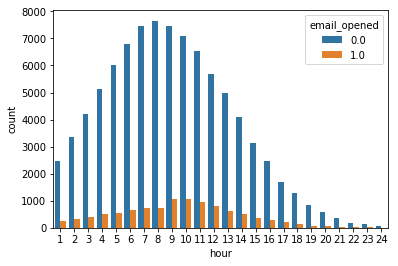

In [62]:
sns.countplot(x="hour",hue="email_opened", data=email_table)
plt.show()

The distributions of hour when email sent and emailopened are not entirely coharent . for example, maximum emails are sent at 
8 hours but the peak number of emails clicked is at 9 and 10 hours. should use statistical test----------------

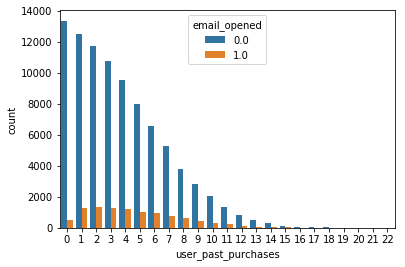

In [63]:
sns.countplot(x="user_past_purchases",hue="email_opened", data=email_table)
plt.show()

maximum emails are opened by users who have between 1 to 4 past purchases 

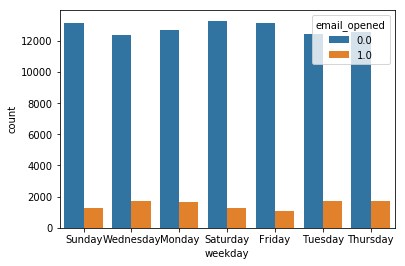

In [66]:
sns.countplot(x="weekday",hue="email_opened", data=email_table)
plt.show()

Maxium emails are opened on weekdays(mon-thur) and relatively less on weekends(fri-sun). Maybe because people dont like checking
mails on weekends if we assume many of them are working professionals with office emails 

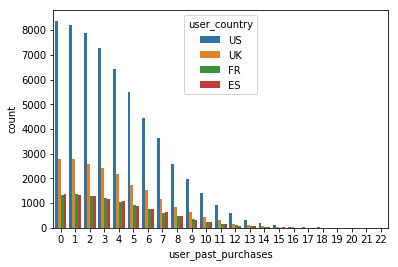

In [67]:
sns.countplot(x="user_past_purchases",hue="user_country", data=email_table)
plt.show()

we can see the biggest market is us,followed by uk,france and spain when talked about past purchases. Let us see at what hours do
individual countries peak in opening emails so that we dont focus are attention completely to us and give emphasis to a holistic
global strategy

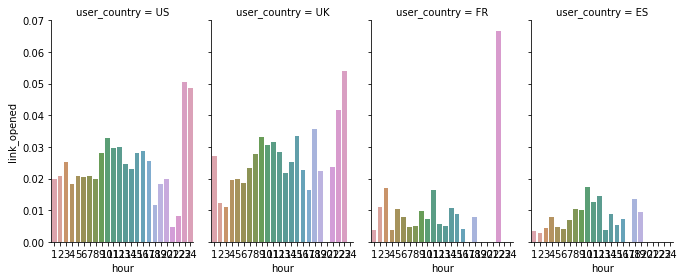

In [93]:
g = sns.factorplot(x="hour", y="link_opened", col="user_country",
                    data=email_table, saturation=.5,
                   kind="bar", ci=None, aspect=.6)

different countries have varied peak hours when email has been opened

statistical tests

In [6]:
email_table.head()

email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  email_opened  link_opened  
0                    5           0.0          0.0  
1                    2           1.0          1.0  
2                    2           0.0          0.0  
3                    1           0.0          0.0  
4                    6           0.0          0.0

In [10]:
pd.crosstab(index=email_table["user_country"],columns=email_table['user_past_purchases'])

user_past_purchases    0     1     2     3     4     5     6     7     8   \
user_country                                                                
ES                   1368  1340  1276  1171  1083   892   777   638   463   
FR                   1341  1390  1292  1212  1057   906   748   605   467   
UK                   2791  2805  2575  2427  2179  1755  1530  1165   861   
US                   8377  8216  7893  7267  6424  5489  4463  3643  2602   

user_past_purchases    9  ...   13   14   15  16  17  18  19  20  21  22  
user_country              ...                                             
ES                    315 ...   63   32   21  13   5   4   2   2   0   0  
FR                    343 ...   60   39   15   5   6   5   4   0   1   0  
UK                    646 ...  123   80   35  30  11   7   1   2   2   0  
US                   1992 ...  332  211  117  54  38  19   8   7   1   1  

[4 rows x 23 columns]

In [32]:
chi2, p, dof, ex=chi2_contingency(pd.crosstab(index=email_table["user_country"],columns=email_table['user_past_purchases']))
p

0.3926888874732057

In [12]:
pd.crosstab(index=email_table["email_opened"],columns=email_table['weekday'])

weekday       Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
email_opened                                                                
0.0            13126   12696     13292   13126     12586    12439      12390
1.0             1051    1667      1277    1261      1691     1704       1694

In [31]:
chi2, p, dof, ex=chi2_contingency(pd.crosstab(index=email_table["email_opened"],columns=email_table['weekday']))
p

8.857573432477101e-74

In [19]:
pd.crosstab(index=email_table["email_version"],columns=email_table['email_opened'])

email_opened     0.0   1.0
email_version             
generic        46225  3984
personalized   43430  6361

In [29]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex=chi2_contingency(pd.crosstab(index=email_table["email_version"],columns=email_table['email_opened']))
p

2.9597545351683344e-139

reject null hypothesis and there is a relation between email_opened and whether the email version is generic or personalized 

In [48]:
def cross(data,col1,col2):
    return pd.crosstab(index=data[col1],columns=data[col2])

In [119]:
#list_=[('email_version','link_opened'),('link_opened','weekday'),('user_past_purchases','link_opened'),('hour','link_opened'),('user_country','link_opened'),
      #('email_text','email_version'),('email_text','link_opened'),('email_text','hour'),('email_version','hour'),('email_version','weekday'),
      #('user_country','user_past_purchases')]
#results=[]
#for i in list_:
        #results=chi2_contingency(cross(email_table,i[0],i[1]))
        #print(str(results[1])+" is p value for" + " "+ str(i))


In [118]:
import itertools
t2 = ('email_text','email_version','hour','weekday','user_country','user_past_purchases','link_opened')
list_=tuple(itertools.combinations(t2, 2))
results=[]
for i in list_:
        results=chi2_contingency(cross(email_table,i[0],i[1]))
        print(str(results[1])+" is p value for" + " "+ str(i))

0.933697942602866 is p value for ('email_text', 'email_version')
0.5662630689834116 is p value for ('email_text', 'hour')
0.6948693159661439 is p value for ('email_text', 'weekday')
0.8732028149651161 is p value for ('email_text', 'user_country')
0.0007533263354063399 is p value for ('email_text', 'user_past_purchases')
5.406196945274225e-09 is p value for ('email_text', 'link_opened')
0.8737781032870988 is p value for ('email_version', 'hour')
0.03599263420577056 is p value for ('email_version', 'weekday')
0.7969783249923549 is p value for ('email_version', 'user_country')
0.14280863363048943 is p value for ('email_version', 'user_past_purchases')
1.6505053608494449e-40 is p value for ('email_version', 'link_opened')
0.20382066824290995 is p value for ('hour', 'weekday')
0.33543238458984886 is p value for ('hour', 'user_country')
0.7592094551355528 is p value for ('hour', 'user_past_purchases')
7.439809479731766e-10 is p value for ('hour', 'link_opened')
0.7087721974066247 is p value 

the  p values which are less than the critical value(0.05) which means all the pairs are dependent on each other and the ones greater than that are independent

Trade off between the following features to choose the final ones in model
1. ('email_text', 'user_past_purchases')
2.('email_text', 'link_opened')
3.('email_version', 'weekday')
4.('email_version', 'link_opened')
5.('hour', 'link_opened')
6.('weekday', 'link_opened')
7.('user_country', 'link_opened')
8. ('user_past_purchases', 'link_opened')

In [111]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [133]:
formula = 'user_past_purchases ~ C(email_text) + C(email_version) + C(hour) + C(weekday) + C(user_country) +C(link_opened)'
model = ols(formula, email_table).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

                        sum_sq       df            F         PR(>F)
C(email_text)     2.839236e+01      1.0     2.811378   9.360105e-02
C(email_version)  4.077869e+01      1.0     4.037857   4.449296e-02
C(hour)           2.206282e+02     23.0     0.949841   5.295492e-01
C(weekday)        1.243107e+02      6.0     2.051517   5.542815e-02
C(user_country)   1.832059e+02      3.0     6.046942   4.116948e-04
C(link_opened)    1.151803e+04      1.0  1140.501788  1.320618e-248
Residual          1.009546e+06  99964.0          NaN            NaN


There is no relation between the customer's past purchase history and the email text and version sent to them, as the p value is 
higher than threshold. That means that company did not consider before sending the type of email text and version to the customer, if the customer has had a high or low purchase in the past.

Improve click through rate

In [8]:
email_table.head()

email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  email_opened  link_opened  
0                    5           0.0          0.0  
1                    2           1.0          1.0  
2                    2           0.0          0.0  
3                    1           0.0          0.0  
4                    6           0.0          0.0

In [83]:
def clickthrough(data,col1):
    df=pd.crosstab(index=email_table[col1],columns=email_table['link_opened'])
    df = df.rename(columns={0.0: 'no', 1.0: 'yes'})
    df=df.apply(lambda row: row.yes/(row.no + row.yes), axis=1)
    df = pd.DataFrame(df)
    df = df.rename(columns={0.0: 'click ratio'})
    df.reset_index(level=0, inplace=True)
    return sns.barplot(x=col1, y="click ratio", data=df)

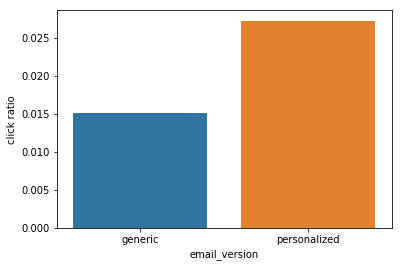

In [84]:
clickthrough(email_table,'email_version')

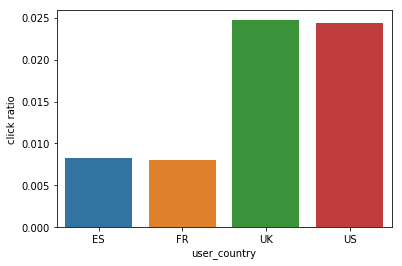

In [85]:
clickthrough(email_table,'user_country')

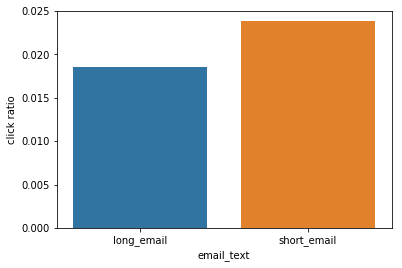

In [64]:
clickthrough(email_table,'email_text')

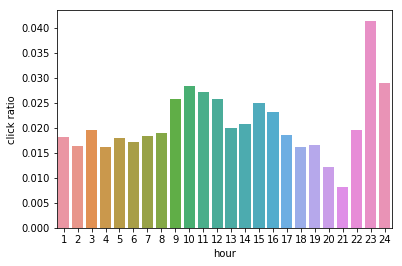

In [65]:
clickthrough(email_table,'hour')

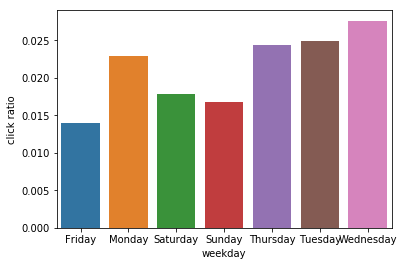

In [66]:
clickthrough(email_table,'weekday')

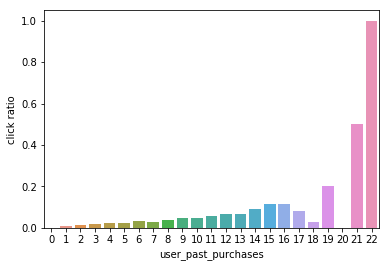

In [68]:
clickthrough(email_table,'user_past_purchases')

In [80]:
email_table.head()

email_id   email_text email_version  hour    weekday user_country  \
0     85120  short_email  personalized     2     Sunday           US   
1    966622   long_email  personalized    12     Sunday           UK   
2    777221   long_email  personalized    11  Wednesday           US   
3    493711  short_email       generic     6     Monday           UK   
4    106887   long_email       generic    14     Monday           US   

   user_past_purchases  email_opened  link_opened  
0                    5           0.0          0.0  
1                    2           1.0          1.0  
2                    2           0.0          0.0  
3                    1           0.0          0.0  
4                    6           0.0          0.0

In [86]:
df_email_text = pd.get_dummies(email_table['email_text'])
df_email_version = pd.get_dummies(email_table['email_version'])
df_email_weekday = pd.get_dummies(email_table['weekday'])
df_email_country = pd.get_dummies(email_table['user_country'])

In [87]:
df_dummy = pd.get_dummies(email_table, columns = ['email_text', 'email_version', 'weekday', 'user_country'])

In [91]:
df_dummy.drop(['email_opened'], axis=1,inplace=True)

In [92]:
df_dummy.head()

email_id  hour  user_past_purchases  link_opened  email_text_long_email  \
0     85120     2                    5          0.0                      0   
1    966622    12                    2          1.0                      1   
2    777221    11                    2          0.0                      1   
3    493711     6                    1          0.0                      0   
4    106887    14                    6          0.0                      1   

   email_text_short_email  email_version_generic  email_version_personalized  \
0                       1                      0                           1   
1                       0                      0                           1   
2                       0                      0                           1   
3                       1                      1                           0   
4                       0                      1                           0   

   weekday_Friday  weekday_Monday  weekday_Saturday  weekday_Sunday  \
0               0               0                 0               1   
1               0               0                 0               1   
2               0               0                 0               0   
3               0               1                 0               0   
4               0               1                 0               0   

   weekday_Thursday  weekday_Tuesday  weekday_Wednesday  user_country_ES  \
0                 0                0                  0                0   
1                 0                0                  0                0   
2                 0                0                  1                0   
3                 0                0                  0                0   
4                 0                0                  0                0   

   user_country_FR  user_country_UK  user_country_US  
0                0                0                1  
1                0                1                0  
2                0                0                1  
3                0                1                0  
4                0                0                1